## Linear models for classification

### Multi-class classification with linear models

#### LinearSVC with M classes generates M one vs rest classifiers.

In [93]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
# from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
# from adspy_shared_utilities import (
# plot_class_regions_for_classifier_subplot)
# from sklearn.datasets import make_classification

fruits = pd.read_table('fruit_data_with_colors.txt')

print(fruits.describe())

feature_names_fruits = ['height', 'width', 'mass', 'color_score']
X_fruits = fruits[feature_names_fruits]
y_fruits = fruits['fruit_label']
target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']

X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(X_fruits_2d, y_fruits_2d, random_state = 0)

clf = LinearSVC(C=2.47, random_state = 100).fit(X_train, y_train)
print('Coefficients:\n', clf.coef_)
print('Intercepts:\n', clf.intercept_)

       fruit_label        mass      width     height  color_score
count    59.000000   59.000000  59.000000  59.000000    59.000000
mean      2.542373  163.118644   7.105085   7.693220     0.762881
std       1.208048   55.018832   0.816938   1.361017     0.076857
min       1.000000   76.000000   5.800000   4.000000     0.550000
25%       1.000000  140.000000   6.600000   7.200000     0.720000
50%       3.000000  158.000000   7.200000   7.600000     0.750000
75%       4.000000  177.000000   7.500000   8.200000     0.810000
max       4.000000  362.000000   9.600000  10.500000     0.930000
Coefficients:
 [[-0.27423954  0.67661828]
 [-1.44517008  1.02504257]
 [-0.00339328  0.29117859]
 [ 1.14521721 -1.4790573 ]]
Intercepts:
 [-2.99930398  1.05130211 -2.31004348  0.79995071]


#### Multi-class results on the fruit dataset

<IPython.core.display.Javascript object>


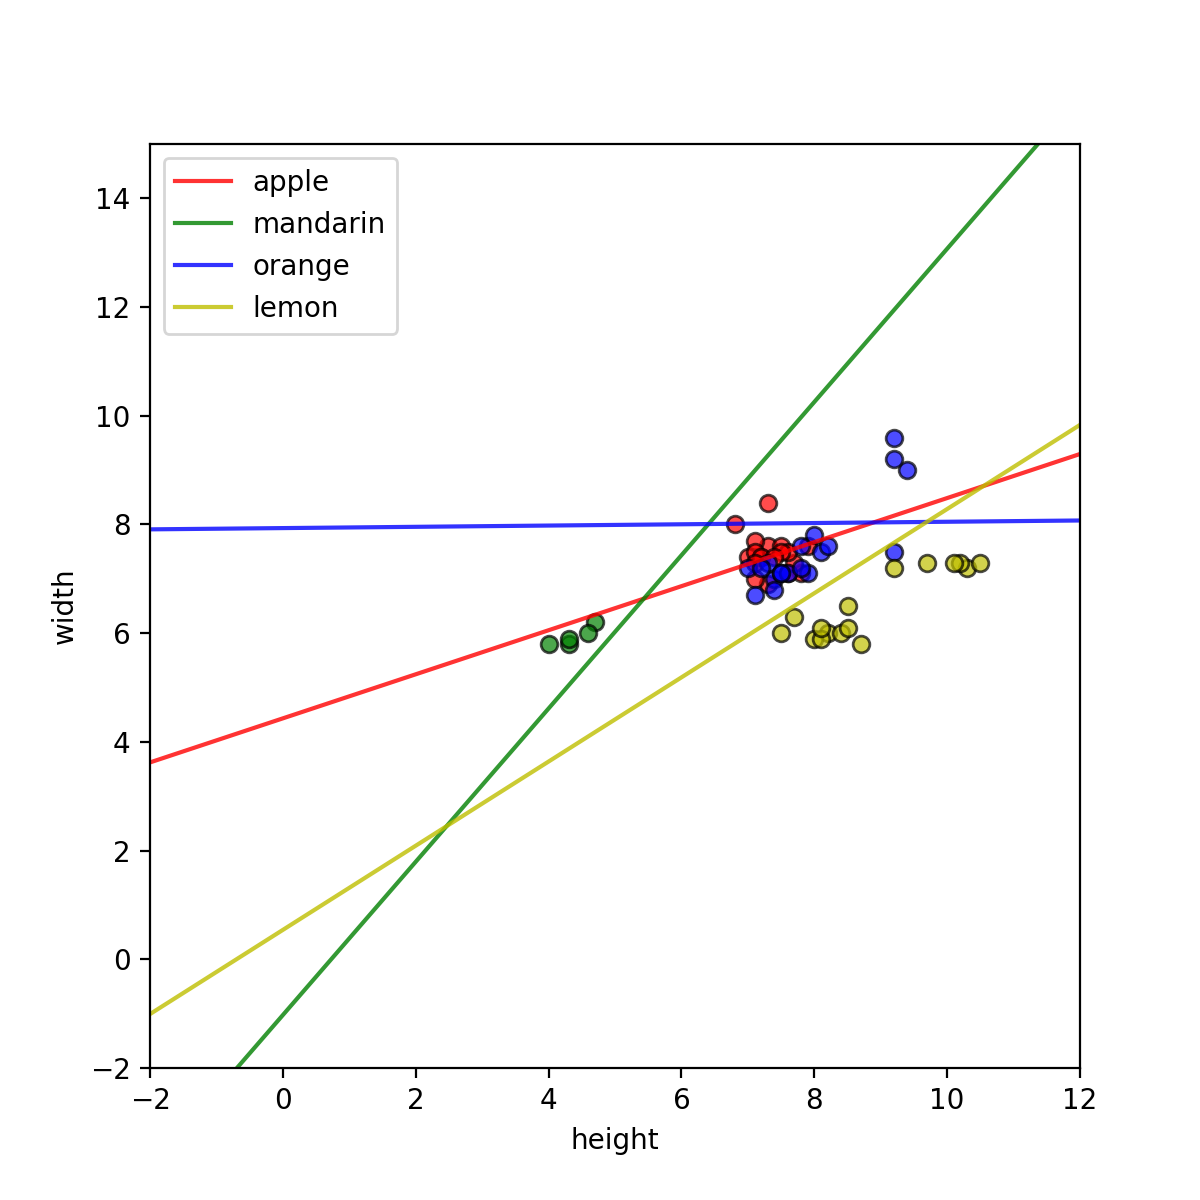

In [94]:
from matplotlib.colors import ListedColormap
import numpy as np

plt.figure(figsize=(6,6))
colors = ['r', 'g', 'b', 'y']
cmap_fruits = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#FFFF00'])

# plt.scatter(X_fruits_2d[['height']], X_fruits_2d[['width']], c=y_fruits_2d, cmap=cmap_fruits, edgecolor = 'black', alpha=.7)
# plt.scatter(X_fruits_2d[['height']], X_fruits_2d[['width']], edgecolor = 'black', alpha=.7)
# the codes above did not work, c=y_fruits_2d caused a problem. Instead of using dataframe like y_fruits_2d, I changed it to a list
# In this way, I can select each dot and specify a color for it

count = 0
for label_el in y_fruits_2d.values.tolist():
    if label_el == 1:
        plt.scatter(X_fruits_2d[['height']].values.tolist()[count], X_fruits_2d[['width']].values.tolist()[count], color = 'r' ,cmap=cmap_fruits, edgecolor = 'black', alpha=.7)
        count += 1
    elif label_el == 2:
        plt.scatter(X_fruits_2d[['height']].values.tolist()[count], X_fruits_2d[['width']].values.tolist()[count], color = 'g' ,cmap=cmap_fruits, edgecolor = 'black', alpha=.7)
        count += 1
    elif label_el == 3:
        plt.scatter(X_fruits_2d[['height']].values.tolist()[count], X_fruits_2d[['width']].values.tolist()[count], color = 'b' ,cmap=cmap_fruits, edgecolor = 'black', alpha=.7)
        count += 1
    elif label_el == 4:
        plt.scatter(X_fruits_2d[['height']].values.tolist()[count], X_fruits_2d[['width']].values.tolist()[count], color = 'y' ,cmap=cmap_fruits, edgecolor = 'black', alpha=.7)
        count += 1

x_0_range = np.linspace(-10, 15)

for w, b, color in zip(clf.coef_, clf.intercept_, ['r', 'g', 'b', 'y']):
    # Since class prediction with a linear model uses the formula y = w_0 x_0 + w_1 x_1 + b, 
    # and the decision boundary is defined as being all points with y = 0, to plot x_1 as a 
    # function of x_0 we just solve w_0 x_0 + w_1 x_1 + b = 0 for x_1:
    plt.plot(x_0_range, -(x_0_range * w[0] + b) / w[1], c=color, alpha=.8)
    
plt.legend(target_names_fruits)
plt.xlabel('height')
plt.ylabel('width')
plt.xlim(-2, 12)
plt.ylim(-2, 15)
plt.show()